In [12]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv('abc.csv', dtype={"Date/Time": object, "Travel Distance": int, "Travel duration": int})
#pd.plotting.parallel_coordinates(
#        df, 'Country')
#plt.show()

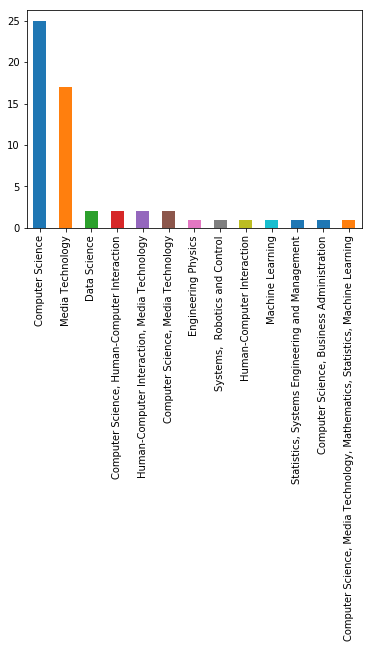

In [62]:
q = df['What is your Major?'].value_counts()

q.plot.bar(rot=90)

In [72]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import pandas as pd 
import pdb

df = pd.read_csv("abc.csv")
#pdb.set_trace()

x = []
#print(type(range(0,len(df[col]))))
def cat_to_num(df, col):
    df[col] = df[col].astype('category')
    mapping = dict(enumerate(df[col].cat.categories))
    #pdb.set_trace()
    df[col] = df[col].cat.codes
    return df[col], mapping

def mapping_to_tick_lists(mappings):
    tickval = []
    ticktext = []
    for k,v in mapping.items():
        tickval.append(k)
        ticktext.append(v)
    
    return tickval, ticktext


for col in df.columns.values:
    if col in ['What degree are you pursuing?']:
        continue
        
    if col in ['What is your Major?', 'What is your first and last name?']:
        df[col], mapping = cat_to_num(df, col)
        t_val, t_text = mapping_to_tick_lists(mapping)
        x.append(dict(label=" ".join(col.split(" ")[-2:-1]), tickvals=t_val, ticktext=t_text, values=df[col]))
    else:
        x.append(dict(label=" ".join(col.split(" ")[-2:-1]), values=df[col]))
    
data = [
    go.Parcoords(
        #line = dict(color = df['What is your first and last name?'],
         #          colorscale = [[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'#F3F10F']]),
#         dimensions = list([
#             dict(
                
#                 label = 'How would you rate your drawing and artistic skills?', values = df['How would you rate your drawing and artistic skills?']),
#             dict(
#                 label = 'How would you rate your Information Visualization skills?', values = df['How would you rate your Information Visualization skills?']),
#             dict(
#                 label = 'How would you rate your statistical skills?', values = df['How would you rate your statistical skills?']),
#             dict(
#                 label = 'How would you rate your mathematics skills?', values = df['How would you rate your mathematics skills?'])
#         ])
        dimensions=x,
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
plotly.offline.plot(fig)
df.to_csv("try", sep='\t')